In [1]:
import urllib
url = "https://data.mendeley.com/datasets/rfhhh54g9m/2/files/c3ef4285-ed19-447a-b7bf-effd94a62fbb/sample_spectrum.txt"
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url = url, headers = headers)
data = urllib.request.urlopen(req).read().decode()

In [2]:
def load_data(data) :
    import numpy as np 
    contents = data.splitlines()
    energy_length = contents[7] 
    start_string = contents[7].find("=") + 1 
    end_string = len(contents[7])
    energy_length = int(contents[7][start_string : end_string]) 

    angle_length = contents[10] 
    start_string = contents[10].find("=") + 1 
    end_string = len(contents[10])
    angle_length = int(contents[10][start_string : end_string]) 

    angle = contents[11] 
    start_string = contents[11].find("=") + 1 
    end_string = len(contents[11]) 
    angle_temp = contents[11][start_string : end_string]

    angle = np.linspace(0, 0, angle_length)

    start_string = 0 
    for ii in range(angle_length):
        end_string = angle_temp.find(" ", start_string)
        angle[ii] = float(angle_temp[start_string : end_string]) 
        start_string = end_string + 1

    energy = np.linspace(0, 0, energy_length)

    intensity = np.ndarray((energy_length, angle_length)) 

    for ii in range(energy_length):
        intensity_temp = contents[57 + ii]
        end_string = len(intensity_temp)
        intensity_temp = intensity_temp[1 : end_string] 

        start_string = 0
        for jj in range(angle_length + 1): 
            end_string = intensity_temp.find("  ", start_string)
            if jj == 0 : 
                energy[ii] = float(intensity_temp[start_string : end_string]) 
                start_string = end_string + 1
            elif jj > 0 :
                intensity[ii][jj - 1] = float(intensity_temp[start_string : \
                         end_string]) 
                start_string = end_string + 1
    return energy, angle, intensity 

In [3]:
[energy, angle, spectra] = load_data(data)

In [4]:
def create_cmap(data_path):
    import numpy as np
    from matplotlib.colors import ListedColormap
    contents = open(data_path, "r").readlines()
    cmap_length = len(contents)
    cmap = np.ndarray((cmap_length, 4))

    for ii in range(cmap_length):
        cmap_row = contents[ii][:-1].split('\t')
        cmap[ii, 0] = cmap_row[0]
        cmap[ii, 1] = cmap_row[1]
        cmap[ii, 2] = cmap_row[2]
        cmap[ii, 3] = 1 # Default alpha
    cmap = ListedColormap(cmap)
    return cmap

In [5]:
blue_hot = create_cmap("/Users/Pranab/Dropbox/Shared/NUS_PC/Python/ARPES/cmap_blue_hot.dat")

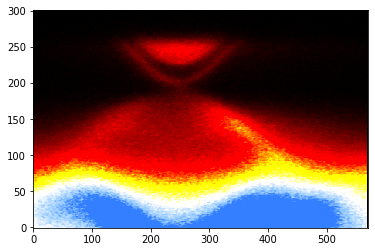

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(spectra, aspect='auto', origin="lower", cmap=blue_hot, vmin=0, vmax=3000)
plt.show()